In [11]:
# a. Import necessary packages
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.utils import to_categorical
import numpy as np

In [12]:
# b. Load the training and testing data
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [13]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [14]:
# c. Define the network architecture using Keras
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [15]:
# d. Train the model using SGD/Adam optimizer
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2705 - loss: 2.0027 - val_accuracy: 0.3366 - val_loss: 1.8827
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3790 - loss: 1.7368 - val_accuracy: 0.4005 - val_loss: 1.6714
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4181 - loss: 1.6402 - val_accuracy: 0.4070 - val_loss: 1.6498
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.4400 - loss: 1.5760 - val_accuracy: 0.4277 - val_loss: 1.6179
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4556 - loss: 1.5286 - val_accuracy: 0.4385 - val_loss: 1.5728
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4687 - loss: 1.4823 - val_accuracy: 0.4499 - val_loss: 1.5448
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4877 - loss: 1.4488 - val_accuracy: 0.4514 - val_loss: 1.5474
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4938 - loss: 1

In [17]:
# e. Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)
print('Test Loss:',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5005 - loss: 1.4164
Test accuracy: 0.4975000023841858
Test Loss: 1.4218231439590454


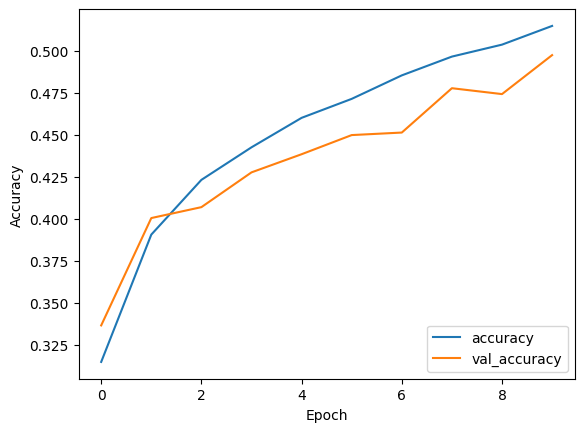

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

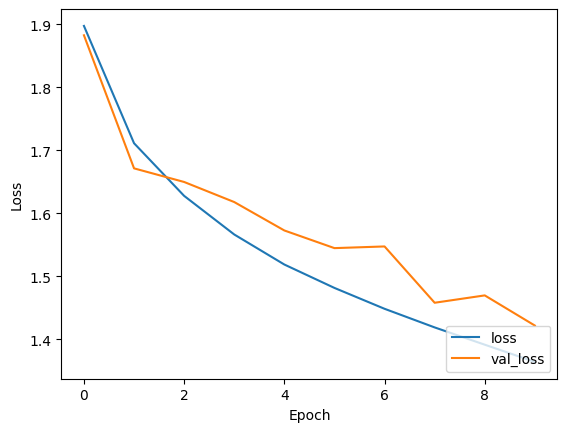

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

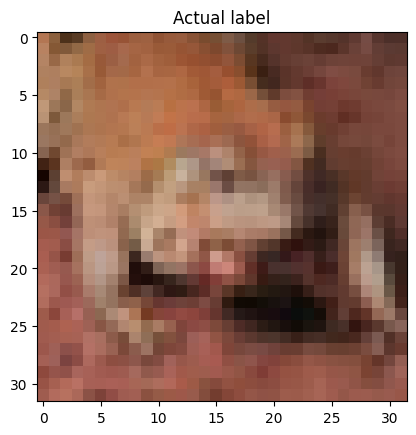

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Actual  frog
Predicted   frog


In [20]:
n = 5
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']  # Replace with your actual class names


plt.imshow(x_test[n])
plt.title("Actual label")
plt.show()

predicted = model.predict(x_test[n].reshape(1, 32, 32, 3))
actual_label = class_names[np.argmax(y_test[n])]  # Get actual class name
predicted_label = class_names[np.argmax(predicted)]  # Get predicted class name

print("Actual ", actual_label)  # Print actual class name
print("Predicted  ", predicted_label)